<center><b>CSIE604284 • Analitika Media Sosial</b></center>
<center><b>Fakultas Ilmu Komputer, Universitas Indonesia</b></center>
<center><b>Tutorial 2 - Text Classification</b></center>
<center><i>Deadline</i> Pengumpulan: Jumat, 04 Juni 2021, pukul 22.00</center>

<b>Instruksi Pengerjaan</b>:
* Tugas ini adalah tugas individu. 
* Anda diberikan berkas Tutorial2_TextClassification.ipynb dan kumpulan data pada folder dataset.
* Tuliskan jawaban Anda pada berkas ini dan kumpulkan melalui SCeLE dengan format penamaan Tutorial2_Nama_NPM.ipynb sebelum tanggal 04 Juni 2021 pukul 22:00. 

<b>Tuliskan nama dan NPM Anda di sini</b><br>
Nama: Muhammad Farras Nur Aslam
<br>
NPM: 1806191433

# A. Klasifikasi gender dari profil user Twitter

Tutorial ini menggunakan <i>dataset</i> dari <a href='https://www.kaggle.com/efeergun96/classification-by-tweets-nlp'>Kaggle</a> yang telah dimodifikasi untuk mengklasifikasikan <i>gender</i> pengguna Twitter. <i>Dataset</i> ini memuat informasi pengguna Twitter dan juga sampel <i>tweet</i>. Tabel 1 merangkum informasi atribut pada <i>dataset</i> yang digunakan pada tutorial ini (<i>data_gender.csv</i>). 

Tabel 1. Informasi Atribut pada <i>Dataset data_gender.csv</i>

|Nama Atribut|Jenis Data|Keterangan| 
|------|------|------|
|<i>gender</i>|kategorikal|gender penggunan Twitter, akan digunakan sebagai label|
|<i>fav_number</i>|numerik|jumlah tweet yang difavoritkan oleh pengguna|
|<i>link_color</i>|kategorikal|warna link pada profil pengguna, dituliskan dalam hex code|
|<i>retweet_count</i>|numerik|jumlah tweet yang di-retweet oleh pengguna|
|<i>sidebar_color</i>|kategorikal|warna sidebar pada profil pengguna, dituliskan dalam hex code|
|<i>tweet_count</i>|numerik|jumlah tweet yang ditulis oleh pengguna|
|<i>user_timezone</i>|kategorikal|jenis zona waktu pengguna|

Langkah-langkah untuk mengklasifikasikan <i>gender</i> dari <i>dataset</i> tersebut adalah sebagai berikut:

<b>1. Membaca data</b><br>
Library pandas digunakan untuk membaca <i>dataset</i>. Tipe data yang terbentuk setelah membaca berkas csv menggunakan fungsi $read\_csv$ dari pandas adalah <i>dataframe</i>. Untuk mengetahui dimensi dari <i>dataframe</i> yang terbentuk, dapat digunakan properti $shape$. Sementara itu, $data.head()$ digunakan untuk menampilkan sampel data (5 teratas). 

<b>#Code 1</b>

In [1]:
# membaca data menggunakan pandas

import pandas as pd

data = pd.read_csv('dataset/gender-data.csv', delimiter=',')
print(data.shape)
data.head()

(6323, 7)


,gender,fav_number,link_color,retweet_count,sidebar_color,tweet_count,user_timezone
0,male,0,08C2C2,0,FFFFFF,110964,Chennai
1,female,37318,3B94D9,0,0,31462,-
2,female,3901,F5ABB5,0,0,20036,Central Time (US & Canada)
3,female,1825,9266CC,0,0,482,-
4,female,3115,9266CC,0,FFFFFF,26085,Amsterdam


<b>2. Fungsi $describe()$</b><br>
Fungsi $describe()$ digunakan untuk menampilkan gambaran statistik singkat dari keseluruhan data atau kolom/fitur tertentu dari data.

<b>#Code 2</b>

In [2]:
data.describe()

,fav_number,retweet_count,tweet_count
count,6323.000000,6323.000000,6.323000e+03
mean,7213.308082,0.099004,3.454298e+04
std,15519.930249,2.148255,7.721278e+04
min,0.000000,0.000000,1.000000e+00
25%,329.000000,0.000000,4.245000e+03
50%,1951.000000,0.000000,1.333100e+04
75%,7149.000000,0.000000,3.736200e+04
max,341621.000000,153.000000,2.680199e+06


Fungsi $describe()$ akan menampilkan statistik standar (<i>mean</i>, <i>std</i>, <i>min</i>, <i>max</i>) untuk kolom/atribut bertipe kuantitatif (numerik), sedangkan untuk kolom bertipe kualitatif  (kategorikal) maka informasi yang akan ditampilkan berupa:
* count: Jumlah <i>filled in</i>/ row yang terisi
* unique: Berapa banyak nilai unik/level
* top: Nama item yang paling banyak muncul dalam data
* Freq: Seberapa sering top item umum muncul dalam data

contoh:

In [3]:
data['sidebar_color'].value_counts(dropna=False)

0         2702
FFFFFF    2662
181A1E     236
65B0DA     155
5ED4DC     143
A8C7F7     142
BDDCAD      83
CC3366      78
DFDFDF      53
DBE9ED      51
F0A830      14
80808        4
Name: sidebar_color, dtype: int64

<b>3. Transformasi data kategorikal ke numerik</b><br>
Atribut kategorikal perlu ditransformasi ke dalam bentuk numerik untuk bisa digunakan sebagai fitur dalam klasifikasi. Proses <i>encoding</i> dari data kategorikal ke dalam data numerik dapat dilakukan dengan properti <i>cat.codes</i>.

<b>#Code 3a</b><br>
Menampilkan tipe data sebelum transformasi

In [4]:
# tipe data column sebelum transformasi

print("Column Data Type before transformation \n" + str(data.dtypes))

Column Data Type before transformation 
gender           object
fav_number        int64
link_color       object
retweet_count     int64
sidebar_color    object
tweet_count       int64
user_timezone    object
dtype: object


<b>#Code 3b</b><br>
Mengubah semua kolom dengan tipe “object” ke dalam bentuk “category”

In [5]:
data[data.select_dtypes(['object']).columns] = data.select_dtypes(
    ['object']).apply(lambda x: x.astype('category'))

print("Column Data Type After Transformation\n" + str(data.dtypes))

Column Data Type After Transformation
gender           category
fav_number          int64
link_color       category
retweet_count       int64
sidebar_color    category
tweet_count         int64
user_timezone    category
dtype: object


<b>#Code 3c</b><br>
Melakukan <i>encoding data</i> kategorikal ke dalam tipe data numerik dengan cat.codes

In [6]:
data[data.select_dtypes(['category']).columns] = data.select_dtypes(
    ['category']).apply(lambda x: x.cat.codes)

print("Column Data Type After Transformation\n" + str(data.dtypes))
data.head()

Column Data Type After Transformation
gender            int8
fav_number       int64
link_color       int16
retweet_count    int64
sidebar_color     int8
tweet_count      int64
user_timezone    int16
dtype: object


,gender,fav_number,link_color,retweet_count,sidebar_color,tweet_count,user_timezone
0,1,0,130,0,11,110964,40
1,0,37318,536,0,0,31462,0
2,0,3901,1495,0,0,20036,39
3,0,1825,972,0,0,482,0
4,0,3115,972,0,11,26085,11


<b>4. Mendefinisikan fitur dan label</b><br>
Pada tutorial ini, dari 6 fitur  kita hanya menggunakan 3 fitur yang meliputi $link\_color$, $sidebar\_color$, dan $tweet\_count$ dalam melakukan klasifikasi <i>gender</i>. Kolom <i>gender</i> digunakan sebagai label.

<b>#Code 4</b>

In [28]:
# mendefinisikan fitur dan label

feat_column = ['link_color', 'sidebar_color', 'tweet_count']
feat = data[feat_column]
label = data['gender']

<b>5. Pembagian Data, Training dan Testing</b><br>
Pada percobaan ini, dilakukan pembagian proporsi 90:10 dimana 90% dibagi menjadi data training dan 10% menjadi data testing. Multinomial Naïve Bayes digunakan untuk membentuk model yang mempelajari data training. Selanjutnya, model yang dibangun digunakan untuk memprediksi data testing yang tidak berlabel.

<b>#Code 5a</b><br>
Melakukan <i>import model selection</i>

In [26]:
# import model selection
from sklearn.model_selection import train_test_split

<b>#Code 5b</b><br>
Pembagian data dengan proporsi 90:10 untuk <i>training</i> dan <i>testing</i> model

In [29]:
# pembagian data dengan proporsi 90:10

train_feat, test_feat, train_labels, test_labels = train_test_split(
    feat, label, test_size=0.1, random_state=150)

print(train_feat.shape)
print(test_feat.shape)

(5690, 3)
(633, 3)


<b>#Code 5c</b><br>
<i>Training</i> dan <i>testing</i> model

In [10]:
# inisiasi jenis classifier
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

# training classifier
classifier_model = NB.fit(train_feat, train_labels)

# prediksi data testing
pred = classifier_model.predict(test_feat)

<b>6. Evaluasi</b><br>
Secara umum, evaluasi pada klasifikasi diukur dengan menggunakan akurasi.
Akurasi dihitung berdasarkan jumlah data yang diprediksi benar dibagi dengan total
data yang diuji secara keseluruhan. Namun ada pula beberapa metrik evaluasi yang
lain, misalnya <i>precision</i> dan <i>recall</i>.

<b>#Code 6</b>

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("Akurasi = ", accuracy_score(test_labels, pred))
print("Precision = ", precision_score(test_labels, pred))
print("Recall = ", recall_score(test_labels, pred))
print("F1 = ",f1_score(test_labels, pred))

Akurasi =  0.5497630331753555
Precision =  0.4745098039215686
Recall =  0.44485294117647056
F1 =  0.45920303605313095


<b>7. Visualisasi Confusion Matrix</b><br>
Visualisasi digunakan untuk memudahkan pembacaan <i>confusion matrix</i>. <i>Source code</i> visualisasi <i>confusion matrix</i> dapat didapatkan dari halaman resmi <a href='https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html'>scikit-learn</a>.

<b><font color='red'>Tugas Tutorial A</font></b>
1. Buatlah visualisasi <i>confusion matrix</i> yang tidak dinormalisasi dari hasil prediksi pada data testing. Buatlah interpretasi dari <i>confusion matrix</i> tersebut. 
2. Jelaskan perbedaan Decision Tree dan Random Forest. Lalu, lakukan percobaan klasifikasi data <i>gender</i> dengan model:
    * Decision Tree jika NPM Anda diakhiri angka ganjil 
    * Random Forest jika NPM Anda diakhiri angka genap
    
  Lakukan evaluasi dengan parameter akurasi, <i>precision</i>, <i>recall</i>, dan F1-score. Bandingkan hasil evaluasi tersebut terhadap model Multinomial Naive Bayes yang kita gunakan sebelumnya. 
    
3. [BONUS] Buatlah kombinasi dari 6 fitur pada data <i>gender</i> tersebut. Kombinasi fitur manakah yang paling baik berdasarkan akurasi dan model yang Anda gunakan pada soal no 2.

### Nomor 1. Visualisasi confusion matrix

In [34]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn

2164    0
4865    1
2312    1
4148    0
5130    0
       ..
4992    0
261     1
2498    1
1184    1
2005    1
Name: gender, Length: 633, dtype: int8
Confusion matrix, without normalization
[[227 134]
 [151 121]]


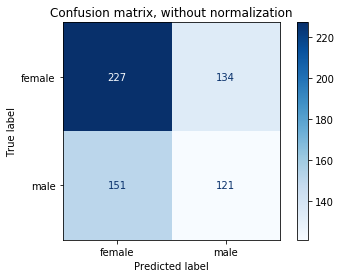

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

print(test_labels)
data['gender'].unique()

gender_names = ['female','male']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]


for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier_model, test_feat, test_labels,display_labels = gender_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

#### Interpretasi confusion matrix

Pada confusion matrix ini menunjukan bahwa terdapat 227 data wanita yang sesuai antara hasil dan prediksinya, dan 121 orang pria yang sesuai dengan hasil prediksinya. Namun, masih terdapat kesalahan pada sebanyak 134 data wanita terprediksi sebagai laki laki dan terdapat 151 data pria yang terprediksi sebagai wanita. Hal ini semakin memperkuat memang akurasi score dari model ini masih cukup rendah yaitu sebesar 0,55 atau 55% yang berarti kurang lebih hanya setengah dari data keseluruhan yang terprediksi benar 

### Nomor 2. Decision Tree & Random Forest

Terdapat perbedaan antara Decision Tree dan Random Forest diantaranya, pada algoritma Decision Tree kita dapat mengontrol dan memilih fitur fitur apa saja yang akan digunakan sebagai predictor dan juga model yang dihasilkan jauh lebih simpel dan biasanya lebih mudah dinterpretasikan karena hasil yang didapatkan jelas perbedaan pengklasifikasiannya sehingga jarang terjadi overlapping juga sedangkan pada algoritma Random Forest, yang sebetulnya merupakan kumpulan dari decision tree yang banyak dan kita dapat mengatur berapa tree yang akan digunakan serta semakin banyak fitur akan semakin tiggi akurasi. Biasanya algoritma Random Forest memilki akurasi yang lebih besar daripada algoritma Decision Tree hal ini karena Random Forest dapat memprediksi dengan akurat fitur yang lebih banyak. Akan tetapi, kita tidak dapat memilih fitur apa yang akan kita gunakan sebagai pengklasifikasian dan tidak bisa mengontrol fitur tersebut diletakan dalam sebuah tree tertentu, Selain itu, random forest pun akurasinya akan terus bertambah selama jumlah pohon yang dibuat akan semakin banyak hingga berada di titik tertentu. 


Referensi :
https://stats.stackexchange.com/questions/285834/difference-between-random-forests-and-decision-tree


In [72]:
#### Mencoba Algoritma Decision Tree

#import library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Model Training
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(train_feat, train_labels)

#predict something
y_pred = classifier_tree.predict(test_feat)
y_pred

#Evaluasi hasil prediksi
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print("Evaluasi Model dengan DecisionTree \n")
print("Akurasi = ", accuracy_score(test_labels, y_pred))
print("Precision = ", precision_score(test_labels, y_pred))
print("Recall = ", recall_score(test_labels, y_pred))
print("F1 = ",f1_score(test_labels, y_pred))

print("\n Perbadingan Hasil Prediksi Decision Tree dengan Naive Bayes \n")
print("Akurasi DT = ", accuracy_score(test_labels, y_pred))
print("Akurasi NB =  ", accuracy_score(test_labels, pred), "\n")
print("Precision DT = ", precision_score(test_labels, y_pred))
print("Precision NB = ", precision_score(test_labels, pred) ,"\n")
print("Recall DT= ", recall_score(test_labels, y_pred))
print("Recall NB =  ", recall_score(test_labels, pred),"\n")
print("F1 score DT = ",f1_score(test_labels, y_pred))
print("F1 scire NB = ",f1_score(test_labels, pred),"\n")


Evaluasi Model dengan DecisionTree 

Akurasi =  0.6429699842022117
Precision =  0.5864661654135338
Recall =  0.5735294117647058
F1 =  0.5799256505576207

 Perbadingan Hasil Prediksi Decision Tree dengan Naive Bayes 

Akurasi DT =  0.6429699842022117
Akurasi NB =   0.5497630331753555 

Precision DT =  0.5864661654135338
Precision NB =  0.4745098039215686 

Recall DT=  0.5735294117647058
Recall NB =   0.44485294117647056 

F1 score DT =  0.5799256505576207
F1 scire NB =  0.45920303605313095 



#### Kesimpulan
Dilihat dari perbandingan tersebut Algoritma Decision Tree menghasilkan hasil prediksi dengan akurasi, precision, recall, dan F1 Score yang lebih baik daripada algoritma Naive Bayes

# B. Klasifikasi Emosi pada Tweet Bahasa 

Pada tutorial ini, kita akan mengklasifikan <i>tweet</i> Bahasa Indonesia ke dalam lima kelas emosi yaitu senang, cinta, marah, sedih, dan takut. <i>Dataset</i> yang digunakan dalam percobaan ini didapatkan dari <i>paper</i> berikut:

Mei Silvana Saputri, Rahmad Mahendra, and Mirna Adriani, <i>Emotion Classification on Indonesian Twitter Dataset</i>.  International Conference on Asian Language Processing (IALP) 2018. Bandung. 2018. 

<i>Dataset</i> terdiri dari 4.403 <i>tweet</i> yang sudah dilakukan <i>pre-processing</i> dengan ketentuan sebagai berikut:
* <i>Username</i> dan <i>mention</i> (ditandai dengan @) diganti dengan kata [USERNAME]
* URL/<i>hyperlink</i> (http:// atau https://..) diganti dengan kata [URL]
* Nomor sensitif, misalnya nomor telepon, nomor <i>invoice</i>, dan nomor pelacakan jasa pengiriman diganti dengan kata [SENSITIVE-NO]

<i>Dataset</i> ini memuat <i>tweet</i> beremosi eksplisit dan implisit. Tabel 2 menunjukkan contoh <i>tweet</i> beremosi eksplisit dan implisit.

Tabel 2. Contoh Data Emosi Eksplisit dan Emosi Implisit

| Emosi Eksplisit | Emosi Implisit |
|------|------|
|hari ini libur, rencananya mau nonton Jurassic World, tapi kayanya gajadi deh mengingat kondisi yg gak fit bgt ini <b>sebel</b>. Rusak rencana sebelanga.. <b>sebel</b> akutu <font color='blue'>(marah)</font>|Ini aja membuktikan anda sudah TIDAK BENAR....!!! MASA NAPI KORUPTOR BISA PUNYA HP DI PENJARA ITU SDH MELANGGAR ATURAN.... DAN ANDA DG ENAKNYA MELANGGAR ATURAN...!! INI MENANDAKAN BAHWA ITULAH KARAKTER ANDA <font color='blue'>(marah)</font>|

Untuk mengklasifikan <i>tweet</i> menjadi lima kelas emosi, dilakukan ekstraksi 4 fitur berikut:
* Fitur Unigram
* Fitur Leksikon Sentimen 
* Fitur POS Tag
* Fitur Ortografi

Langkah-langkah untuk melakukan klasifikasi emosi pada <i>dataset tweet</i> emosi tersebut adalah sebagai berikut:

<b>1. Import library</b><br>
<i>Library</i> yang digunakan pada tutorial ini antara lain pandas, numpy, nltk, Sastrawi, dan sklearn. 

<b>#Code 1</b>

In [73]:
!pip install nltk
!pip install Sastrawi

import pandas as pd
import numpy as np
import nltk
import Sastrawi
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.tag import CRFTagger
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import warnings
warnings.filterwarnings("ignore")

<b>2. Membaca data</b><br>
Data dibaca dengan <i>library</i> pandas.

<b>#Code 2</b>

In [74]:
# membaca data
raw_data = pd.read_csv("dataset/Twitter_Emotion_Dataset.csv",
                       delimiter=",", encoding="Latin-1")
print(raw_data.shape[0])
raw_data.head()

4401


,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


<b>3. Pra-pemrosesan data</b><br>
Data Twitter bersifat <i>unstructured</i> dan memiliki format penulisan bebas (tidak sesuai kaidah penulisan yang benar). Oleh karena itu, dilakukan pra-pemrosesan data untuk melakukan normalisasi isi <i>tweet</i>. 

Dalam percobaan ini, dilakukan pra-pemrosesan berupa:

    a. Normalisasi tweet
    Normalisasi tweet terdiri dari pengubahan ke huruf kecil, pembuangan spasi yang berlebihan, trimming, pembuangan tanda baca, penghilangan huruf berulang (misalnya haiiii -> hai). Fungsi normalisasi (tweet) menerima input berupa satu buah tweet mentah bertipe string. 

<b>#Code 3a</b>

In [75]:
def normalisasi(tweet):
    normal_tw = tweet.lower()  # lowercase
    normal_tw = re.sub('\s+', ' ', normal_tw)  # remove extra space
    normal_tw = normal_tw.strip()  # trim depan belakang
    normal_tw = re.sub(r'[^\w\s]', '', normal_tw)  # buang punctuation
    # regex huruf yang berulang kaya haiiii (untuk fitur unigram)
    normal_regex = re.compile(r"(.)\1{1,}")
    # buang huruf yang berulang
    normal_tw = normal_regex.sub(r"\1\1", normal_tw)
    return normal_tw

    b. Pembuangan stopwords dan istilah spesial (username, hyperlink, sensitive-no)
    Daftar stopwords didapatkan dari penelitian Tala.
    
    Tala, F. Z. (2003). A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia. M.S. thesis. M.Sc. Thesis. Master of Logic Project. Institute for Logic, Language and Computation. Universiteti van Amsterdam The Netherlands.
    
    Fungsi remove_stopwords(tweet) menerima masukan berupa tweet yang sudah dinormalisasi yang bertipe string.
    
<b># Code 3b</b>

In [76]:
def remove_stopwords(tweet):
    token = nltk.word_tokenize(tweet)
    token_afterremoval = []
    for k in token:
        if k not in stopwords and k not in special_list:
            token_afterremoval.append(k)

    str_clean = ' '.join(token_afterremoval)
    return str_clean

    c. Di luar tutorial ini Anda bisa mencoba opsi stemming pada tahap pra-pemrosesan. Fungsi stemming akan didefinisikan pada tutorial ini, namun tidak dijalankan untuk mempercepat proses normalisasi isi tweet. Pra-pemrosesan sifatnya tidak wajib seluruhnya diterapkan. Fungsi stemming(tweet) menerima masukan berupa satu buah tweet bertipe string. 

<b>#Code 3c</b>

In [77]:
def stemming(tweet):
    token = nltk.word_tokenize(tweet)
    stem_kalimat = []
    for k in token:
        stem_kata = stemmer.stem(k)
        stem_kalimat.append(stem_kata)

    stem_kalimat_str = ' '.join(stem_kalimat)
    return stem_kalimat_str

    d. Pra-pemrosesan tweet secara keseluruhan
    Pada tahap ini, akan dilakukan pemanggilan fungsi normalisasi dan remove_stopwords yang sudah didefinisikan sebelumnya. Setelah itu akan ditampilkan sampel tiga tweet pertama yang sudah dilakukan pra-pemrosesan. 
    
<b>#Code 3d</b>    

In [79]:
nltk.download('punkt')
def pra_pemrosesan(list_tweet):
    tweet_clean = []
    for tw in list_tweet:
        normal_tweet = normalisasi(tw)
#         normal_tweet = stemming(normal_tweet)
        normal_tweet = remove_stopwords(normal_tweet)
        tweet_clean.append(normal_tweet)
    return tweet_clean

raw_tweet = raw_data['tweet'].tolist()
label = raw_data['label'].tolist()

stopwords = pd.read_csv('dataset/stopwords.csv', header=None)[0].values
factory = StemmerFactory()
stemmer = factory.create_stemmer()
special_list = ['username', 'url', 'sensitive-no']
clean_tweet = pra_pemrosesan(raw_tweet)
clean_tweet[:3]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['jln jatibarupolisi tdk bs gertak gubernur emangny polisi tdk pmbhasan jgn berpolitik pengaturan wilayahhak gubernur tn abang turun temurunpelikperlu kesabaran',
 'cewe lho kayaknya rasain sibuk jaga rasain sakitnya haid paniknya pulang malem gimana orang asing wajarlah korban takut curhat dibela dihujat',
 'kepingin gudeg mbarek bu hj amad foto google sengaja biar temanteman jg membayangkannya berbagi indah']

<b>4. Ekstraksi Fitur Unigram</b><br>
Fitur <i>unigram</i> memuat informasi mengenai frekuensi kemunculan suatu kata di dokumen. Fitur <i>unigram</i> dibentuk menggunakan <i>library</i> $CountVectorizer$ dari $Scikit-learn$. Jumlah kata unik (<i>vocabulary</i>) yang terbentuk bergantung dari data yang digunakan. Tapi, dalam percobaan ini akan digunakan parameter max_features=2000 dimana akan diambil 2000 kata unik yang memiliki frekuensi kemunculan tertinggi. 

<b>#Code 4</b>

In [82]:
def ekstraksi_unigram(tweet):
    unigram = CountVectorizer(ngram_range=(1, 1), max_features=2000)
    unigram_matrix = unigram.fit_transform(np.array(tweet)).todense()
    nama_fitur = unigram.get_feature_names()
    return unigram_matrix, nama_fitur


unigram_feat, feat_name = ekstraksi_unigram(clean_tweet)
print(unigram_feat[:3])
print(feat_name[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['10', '100', '11', '12', '15', '20', '2016', '2017', '2018', '2019']


<b>5. Ekstraksi Fitur Leksikon Sentimen (Kamus Sentimen)</b><br>
Orientasi sentimen dapat digunakan sebagai fitur untuk klasifikasi. Pada tutorial ini, akan digunakan leksikon sentimen dari penelitian berikut ini:

Clara Vania, Moh. Ibrahim, and Mirna Adriani. Sentiment Lexicon Generation for an Under-Resourced Language. CICLING 2014 (IJCLA)

Daftar kata bersentimen positif terdapat pada <i>positif_vania.txt</i> dan daftar kata bersentimen negatif terdapat pada <i>negatif_vania.txt</i>. 

<b>#Code 5a</b><br>
<i>Code</i> ini digunakan untuk mendefinisikan fungsi $ekstraksi\_sentimen$ yang menerima input berupa daftar <i>tweet</i>.

In [81]:
def ekstraksi_sentimen(list_tweet):
    pos = pd.read_csv("dataset/positif_vania.txt", header=None, names=['pos'])
    list_pos = pos['pos'].tolist()
    neg = pd.read_csv("dataset/negatif_vania.txt", header=None, names=['neg'])
    list_neg = neg['neg'].tolist()

    fitur_sentimen_all = []
    for tweet in list_tweet:
        # inisiasi value
        emosi = ["positif", "negatif"]
        value = [0, 0]
        emosi_value = {}
        for i in range(len(emosi)):
            emosi_value[emosi[i]] = value[i]

        list_kata = tweet.split()
        for k in list_kata:
            if k in list_pos:
                emosi_value["positif"] += 1
            if k in list_neg:
                emosi_value["negatif"] += 1

        fitur_sentimen_perkalimat = list(emosi_value.values())
        fitur_sentimen_all.append(fitur_sentimen_perkalimat)

    return fitur_sentimen_all

<b>#Code 5b</b><br>
Pemanggilan fungsi $ekstraksi\_sentimen$ dan menampilkan sampel hasil ekstraksi. 

In [83]:
sentlex_feat = ekstraksi_sentimen(clean_tweet)
print(sentlex_feat[:10])

[[1, 0], [0, 2], [1, 0], [0, 0], [1, 0], [0, 2], [0, 0], [0, 0], [0, 1], [0, 0]]


<b>6. Ekstraksi Fitur Part-Of-Speech Tag</b><br>
<i>Part-of-speech</i> (POS) merupakan kelas kata yang dapat digunakan untuk mengenali emosi pada <i>tweet</i>. Pada percobaan ini, akan dihitung kemunculan kata sifat (JJ) dan kata negasi (NEG) berdasarkan <i>pre-trained</i> POS Tag dari penelitian Dinakarami et. al. yang sudah dikonversi ke dalam bentuk CRF Tagger agar bisa dibaca dari NLTK. 

Arawinda Dinakaramani, Fam Rashel, Andry Luthfi, and Ruli Manurung. <i>Designing an Indonesian Part of speech Tagset and Manually Tagged Indonesian Corpus</i>. International Conference on Asian Language Processing (IALP 2014). Kuching, 20-22 October 2014.

<i>Raw data pre-trained</i> POS Tag yang belum ditransformasi ke dalam bentuk CRF Tagger bisa didapatkan di Fam Rashel’s <a href='https://github.com/famrashel/idn-tagged-corpus'>Github</a>. 

<b>#Code 6a</b><br>
Mendefinisikan fungsi $ekstraksi\_pos$ yang menerima masukan berupa daftar <i>tweet</i>.

In [89]:
def ekstraksi_pos(list_tweet):
    ct = CRFTagger()
    ct.set_model_file("dataset/all_indo_man_tag_corpus_model.crf.tagger")
    pos_feat_list = []
    count_tag = []
    for tweet in list_tweet:
        token = nltk.word_tokenize(tweet)
        tag = ct.tag_sents([token])
        flat_tag = [item for sublist in tag for item in sublist]
        pos_count = Counter([j for i, j in flat_tag])
        pos_feat = (pos_count['JJ'], pos_count['NEG'])
        pos_feat_list.append(pos_feat)
    return pos_feat_list

<b>#Code 6b</b><br>
Memanggil fungsi $ekstraksi\_pos$ dan menampilkan sampel

In [ ]:
import pycrfsuite
postag_feat = ekstraksi_pos(raw_tweet) #ganti raw tweet supaya kata tidak dan bukannya gak ilang
print(postag_feat[:3])

<b>7. Ekstraksi Fitur Ortografi</b><br>
Pada percobaan ini, fitur ortografi yang digunakan sebagai fitur untuk mengenali emosi pada <i>tweet</i> yaitu jumlah huruf kapital, jumlah tanda seru, jumlah huruf dan panjang karakter. Oleh karena itu, <i>dataset</i> yang digunakan untuk menghasilkan fitur ortografi merupakan dataset awal yang belum mengalami pra-pemrosesan. 

<b>#Code 7a</b><br>
Mendefinisikan fungsi $ekstraksi\_ortografi$.

In [91]:
def ekstraksi_ortografi(raw_tweet):
    all_orto_feat = []
    for tw in raw_tweet:
        capital_count = sum(1 for c in tw if c.isupper())
        exclamation_count = sum((1 for c in tw if c == "!"))
        word_len = len(nltk.word_tokenize(tw))
        char_len = len(tw)
        orto_feat = [capital_count, exclamation_count, word_len, char_len]
        all_orto_feat.append(orto_feat)
    return all_orto_feat

<b>#Code 7b</b><br>
Memanggil fungsi EkstraksiPOS

In [92]:
orto_feat = ekstraksi_ortografi(raw_tweet)
orto_feat[:3]

[[35, 0, 41, 220], [3, 0, 44, 235], [5, 0, 22, 116]]

<b>8. Klasifikasi</b><br>
Pada percobaan ini, klasifikasi dilakukan dengan menggunakan algoritma Multinomial Naïve Bayes. Pembagian data training dan testing digunakan menggunakan model k-fold Cross Validation dengan nilai $k = 10$. Dengan model Cross-Validation, proses training dan testing akan dilakukan sebanyak $k$ kali dengan pembagian data yang berbeda. 

<b>#Code 8</b><br>

In [93]:
feat_list = [unigram_feat, sentlex_feat orto_feat]
feat_name = ["Unigram", "Sentimen", "POS", "Ortografi"]
for f, n in zip(feat_list, feat_name):
    X = f
    y = label
    scoring = ['accuracy', 'f1_macro']
    nb = MultinomialNB()
    scores = cross_validate(nb, X, y, cv=10, scoring=scoring)
    acc = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1_macro'])
    print("Jenis Fitur : ", n)
    print("Akurasi :", acc)
    print("F1-Score :", f1)
    print("---------------")

NameError: name 'postag_feat' is not defined

<b><font color='red'>Tugas Tutorial B</font></b>
1. Menurut pemahaman Anda, apa yang dimaksud dengan fitur leksikon? Temukan leksikon lainnya yang dapat digunakan untuk mengekstraksi fitur leksikon.

2. Lakukan eksperimen dengan menggunakan fitur unigram + bigram dengan mengubah <b>#Code 4</b>. Apakah fitur tersebut lebih baik dibandingkan fitur unigram saja berdasarkan F1-score? 

3. Kombinasikan 4 fitur yang sudah kita ekstraksi sebelumnya (unigram, sentimen leksikon, POS Tag dan ortografi). Gunakan F1-Score sebagai metrik evaluasi dan jumlah <i>fold</i> <i>cross validation</i>:
    * k = 3 jika nama lengkap Anda dimulai huruf A-H
    * k = 4 jika nama lengkap Anda dimulai huruf I-M
    * k = 5 jika nama lengkap Anda dimulai huruf N-Z

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tampilkan hasil percobaan pada tabel, sebagai contoh:

|Kombinasi Fitur|F1-Score|
|------|------|
|unigram|------|
|POS tag|------|
|sentimen leksikon|------|
|ortografi|------|
|[unigram, POS tag]|------|
|[unigram, sentimen leksikon]|------|
|[unigram, ortografi]|------|
|...|...|
|[unigram, POS tag, sentimen leksikon, ortografi]|------|

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lakukan analisis dari hasil yang Anda dapat (hint: gunakan np.hstack untuk menggabungkan dua fitur atau lebih).

4. [BONUS] Gunakan leksikon yang Anda dapat pada soal no 1 untuk mengekstraksi fitur sentimen leksikon lainnya. Apakah fitur tersebut lebih baik daripada fitur leksikon dari penelitian Vania berdasarkan F1-score? 

1. Leksikon secara bahasa berarti kamus, maka fitur leksikon ini adalah fitur yang digunakan untuk menyeleksi kata kata yang berada kamus tersebut agar tidak terdapat pada data tweet yang kita punya, leksikon dapat bermacama macam diantaranya bahasa gaul, bahasa kasar, ataupun kata kata singkatan yang ada. Salah satu contoh leksikon yang saya dapatkan adalah lexicon yang diapakai di bahasa bahasa blog pribadi seperti microblog

    https://github.com/fajri91/InSet

    https://www.researchgate.net/publication/321757985_InSet_Lexicon_Evaluation_of_a_Word_List_for_Indonesian_Sentiment_Analysis_in_Microblogs
